In [31]:
import cv2 as c
import numpy as np
import matplotlib.pyplot as plt
import time

In [32]:
def load_image():
    
    img = c.imread('lena_color_512.tif', 1)
    print(img.shape)
    c.imshow('image', img)
    c.waitKey(0)
    c.destroyAllWindows()
    
    c.imwrite('gray_house.jpg', img)
    
# def plot_image(img):
    
#     plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#     plt.show()
    
load_image()

(512, 512, 3)


### video capture using webcam

we create a VideoWriter object. We should specify the output file name (eg: output.avi). Then we should specify the FourCC code (details in next paragraph). Then number of frames per second (fps) and frame size should be passed. And last one is isColor flag. If it is True, encoder expect color frame, otherwise it works with grayscale frame.

FourCC is a 4-byte code used to specify the video codec. 

In [3]:
cap = c.VideoCapture(0)

# Define the codec and create VideoWriter object

vid = c.VideoWriter_fourcc(*'DIVX')
output = c.VideoWriter('output_video.avi', vid, 20.0, (640, 480))


while(True):
    ret, frame = cap.read()
    gray = c.cvtColor(frame, c.COLOR_BGR2GRAY)
    output.write(frame)
    c.imshow('color', frame)
    c.imshow('gray', gray)
    
    if c.waitKey(1) == ord('q'):
        break
        
cap.release()
output.release()
c.destroyAllWindows()

### Core Operations of OpenCV
#### 1. Basic Operations

In [4]:
img1 = c.imread('house.tiff')

# c.imshow('house', img1)
# c.waitKey(0)
# c.destroyAllWindows()

print(img1.shape, img1.size)
px = img1[55, 55]

# print(px)



# changing pixel value to white 
# img1[55:105, 55:105] = [255, 255, 255]
# c.imshow('house', img1)
# c.waitKey(0)
# c.destroyAllWindows()


px1 = img1[78, 151]

# changing pixel values to black
px1 = [0,0,0]

px2 = img1[98, 80]

# changing pixel values to gray
px2 = [127, 127, 127]




## Accessing only blue pixel

# blue = img1[211, 100, 0]
# red = img1[100, 100, 2]
# green = img1[231, 300, 1]
# print('blue:{0}, red:{1}, green:{2}'.format(blue, red, green))

# img1.itemset((100, 100, 2), 100)
# red_new = img1.item(100, 100, 2)
# print('New red value:', red_new)

# ball = img1[228:410, 60:434]
# img1[0:182, 0:374] = ball

# c.imshow('car', img1)
# c.waitKey(0)
# c.destroyAllWindows()

(512, 512, 3) 786432


### Splitting and Merging Image Channels

In [5]:
b, g, r = c.split(img1)

img1 = c.merge((b, g, r))

In [6]:
b = img1[:,:,2]

c.imshow('blue', b)
c.waitKey(0)
c.destroyAllWindows()

### Making Borders for Images (Padding)


(512, 512, 3)


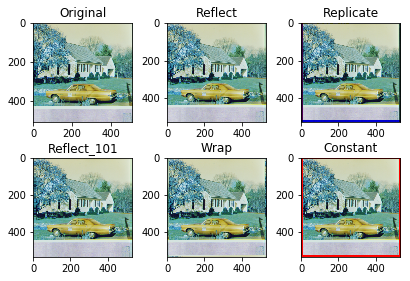

In [7]:
img = c.imread('house.tiff')

c.imshow('son', img)
c.waitKey(0)
c.destroyAllWindows()

# np.resize(img, 786432)
# np.reshape(img, (512,512,3))
print(img.shape)

plt.imshow(img, cmap = "gray", interpolation = 'bicubic')
# plt.show()

reflect = c.copyMakeBorder(img, 10, 10, 10, 10, c.BORDER_REFLECT)
replicate = c.copyMakeBorder(img, 10, 10, 10, 10, c.BORDER_REPLICATE)
reflect101 = c.copyMakeBorder(img, 10, 10, 10, 10, c.BORDER_REFLECT_101)
wrap = c.copyMakeBorder(img, 10, 10, 10, 10, c.BORDER_WRAP)
constant = c.copyMakeBorder(img, 10, 10, 10, 10, c.BORDER_CONSTANT, value = [255, 0, 0])

name = ['original', 'reflect', 'replicate', 'reflect101', 'wrap', 'constant']

# fig = plt.figure(fig_size = (10, 10))

# for i in range(6):
#     ax = fig.add_subplot(3, 3, i+1, x_ticks = [], y_ticks = [])
#     ax.title()
    
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(232), plt.imshow(reflect, 'gray'), plt.title('Reflect')
plt.subplot(233), plt.imshow(replicate,'gray'), plt.title('Replicate')
plt.subplot(234), plt.imshow(reflect101,'gray'), plt.title('Reflect_101')
plt.subplot(235), plt.imshow(wrap,'gray'), plt.title('Wrap')
plt.subplot(236), plt.imshow(constant,'gray'), plt.title('Constant')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

### Blending Images

In [8]:
## blend images
print(img1.shape)
t1 = time.time()
img = c.imread('lena_color_512.tif', 1)
img1 = c.imread('house.tiff')
b_img = c.addWeighted(img1, 0.7, img, 0.3, 0)

c.imshow('blended image', b_img)
c.waitKey(0)
c.destroyAllWindows()
t2 = time.time() # python time library

t = (t2-t1)
print(t)

(512, 512, 3)
0.21629834175109863


### Timing Code

In [9]:
e1 = c.getTickCount()
img1 = c.imread('lena_color_512.tif')
img2 = c.imread('house.tiff')
dst = c.addWeighted(img1,0.7,img2,0.3,0)
c.imshow('dst',dst)
c.waitKey(0)
c.destroyAllWindows()
e2 = c.getTickCount()
time = (e2-e1)/c.getTickFrequency()
print(time)

0.8085202367712188


### Default Optimization in OpenCV


In [10]:
c.useOptimized()
# c.setUseOptimized(True)

True

In [11]:
%timeit res = c.medianBlur(img1, 49)


34.5 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
# %timeit z = c.countNonZero(img)
%timeit z = np.count_nonzero(img)

1.42 ms ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


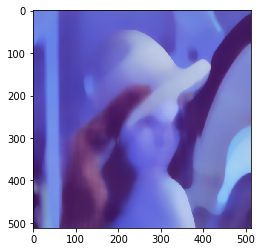

In [13]:
k = c.medianBlur(img1, 37)
plt.imshow(k, 'gray')

In [13]:
img_1 = c.imread('3d.jpg')
img_1.shape

img_2 = c.imread('line.jpg')
img_2.shape

(420, 560, 3)

### Thresholding image


In [14]:

book = c.imread('bookpage.jpg')
gray = c.cvtColor(book, c.COLOR_BGR2GRAY)
retval, threshold = c.threshold(book, 12, 255, c.THRESH_BINARY)
retval1, threshold1 = c.threshold(gray, 12, 255, c.THRESH_BINARY)
retval2, threshold2 = c.threshold(book, 12, 255, c.THRESH_BINARY_INV)
retval3, threshold3 = c.threshold(book, 12, 255, c.THRESH_TRUNC)
retval4, threshold4 = c.threshold(book, 12, 255, c.THRESH_TOZERO)
retval5, threshold5 = c.threshold(book, 12, 255, c.THRESH_TOZERO_INV)

threshold6 = c.adaptiveThreshold(gray,255,c.ADAPTIVE_THRESH_MEAN_C, c.THRESH_BINARY,115,1)
threshold7 = c.adaptiveThreshold(gray,255,c.ADAPTIVE_THRESH_GAUSSIAN_C, c.THRESH_BINARY,115,1)

names = ['Orginal', 'THRESH_BINARY Color', 'THRESH_BINARY Gray', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO',
        'THRESH_TOZERO_INV', 'ADAPTIVE_THRESH_MEAN_C', 'ADAPTIVE_THRESH_GAUSSIAN_C']

images = [book, threshold, threshold1, threshold2, threshold3, threshold4, threshold5, threshold6, threshold7]

# fig = plt.figure(figsize = (15, 15))

# for i in range(9):
#     ax = fig.add_subplot(3, 3, i+1, xticks = [], yticks = [])
# #     ax.title(names[i])
#     ax.imshow(images[i])
# #     plt.subplot(3,3, i+1)
# #     plt.imshow(images[i])
# #     plt.title(names[i])
# #     plt.xticks([]), plt.yticks([])
# plt.show()
    


c.imshow('org', book)
c.imshow('threshold', threshold)
c.imshow('threshold1', threshold1)
c.imshow('gauss', threshold7)
c.waitKey(0)
c.destroyAllWindows()

### Color Filtering 

In [46]:
cap = c.VideoCapture(0)
# cap = c.imread('balls.jpg')

while(1):
#     _, frame = c.imread('love-images-1.jpg')
    __, frame = cap.read()
#     hsv = c.cvtColor(cap, c.COLOR_BGR2HSV)    
    #hsv hue sat value
    
#     lower = np.array([110,50,50])
#     upper = np.array([130,255,255])
    
#     mask = c.inRange(hsv, lower, upper)
    
#     res = c.bitwise_and(cap, hsv, mask = mask)
    
#     kernel = np.ones((15,15), np.float32)/225
#     smooth = c.filter2D(res, -1, kernel)
    
#     blur = c.GaussianBlur(res, (15, 15), 0)
#     median = c.medianBlur(res, 15)
#     bilateral = c.bilateralFilter(res, 15, 75, 75)
    
#     c.imshow('org', cap)
# #     c.imshow('mask', mask)
#     c.imshow('result', res)
#     c.imshow('smoothed', smooth)
#     c.imshow('blur', blur)
#     c.imshow('median', median)
#     c.imshow('bilateral', bilateral)
    
    ## Edge Detection 
    
    laplacian = c.Laplacian(frame, c.CV_64F)
    sobelx = c.Sobel(frame, c.CV_64F, 1, 0, ksize = 5)
    sobely = c.Sobel(frame, c.CV_64F, 0, 1, ksize = 5)
    can = c.Canny(frame, 150, 150)
    
    c.imshow('frame', frame)
    c.imshow('laplacian', laplacian)
    c.imshow('sobelx', sobelx)
    c.imshow('sobely', sobely)
    c.imshow('canny', can)


    
    k = c.waitKey(5) & 0xFF
    
    if k == 27:
        break
        
c.destroyAllWindows()
cap.release()

In [ ]:
green = np.uint8([[[0, 255, 0]]])
hsv_green = c.cvtColor(green, c.COLOR_BGR2HSV)
print(hsv_green)
c.imshow('hsv',hsv_green)
c.waitKey(0)
c.destroyAllWindows()

In [41]:
img = c.imread('j.jpg')

kernel = np.ones((5, 5), np.uint8)
erosion = c.erode(img, kernel, iterations =1)
dilation = c.dilate(img, kernel, iterations =1)

opening = c.morphologyEx(img, c.MORPH_OPEN, kernel)
closing = c.morphologyEx(img, c.MORPH_CLOSE, kernel)

c.imshow('original', img)
c.imshow('erosion', erosion)
c.imshow('dilation', dilation)
c.imshow('opening', opening)
c.imshow('closing', closing)
c.waitKey(0)
c.destroyAllWindows()



### Template Matching

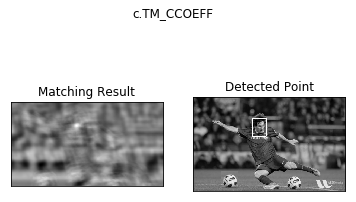

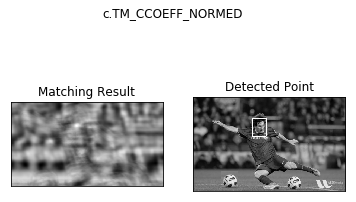

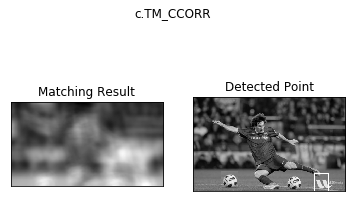

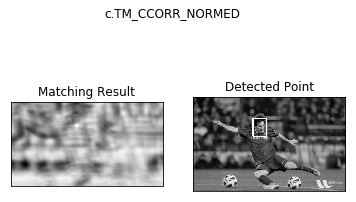

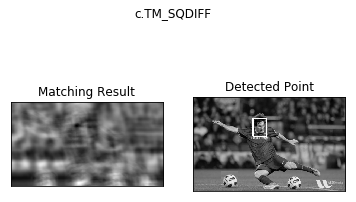

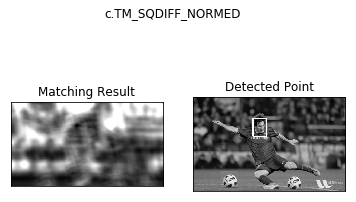

In [54]:
org = c.imread('roi.jpg',0)
org1 = org.copy()
# org_gray = c.cvtColor('org', c.COLOR_BGR2GRAY)
template = c.imread('messi_face.jpg',0)
w, h = template.shape[::-1]
methods = ['c.TM_CCOEFF', 'c.TM_CCOEFF_NORMED', 'c.TM_CCORR',
            'c.TM_CCORR_NORMED', 'c.TM_SQDIFF', 'c.TM_SQDIFF_NORMED']

for i in methods:
    org = org1.copy()
    method = eval(i)
    
    res = c.matchTemplate(org, template, method)
    min_val, max_val, min_loc, max_loc = c.minMaxLoc(res)
    
    if method in [c.TM_SQDIFF, c.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        
    c.rectangle(org,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(org,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(i)
    plt.show()

    

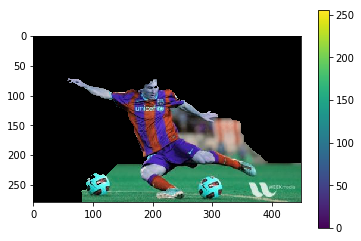

In [85]:
# dog = c.imread('dog.jpg')
dog = c.imread('roi.jpg')


mask = np.zeros(dog.shape[:2], np.uint8)

bgm = np.zeros((1, 65), np.float64)
fgm = np.zeros((1, 65), np.float64)

rect = (50, 50, 500, 400)
c.grabCut(dog, mask, rect, bgm, fgm, 5, c.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask == 0), 0, 1).astype('uint8')
dog = dog*mask2[:,:, np.newaxis]

plt.imshow(dog)
plt.colorbar()
plt.show()

# c.imshow('dog', dog)
# c.waitKey(0)
# c.destroyAllWindows()

In [87]:
cap1 = c.VideoCapture('people-walking.mp4')
fgbg = c.createBackgroundSubtractorMOG2()

while(True):
    ret, frame = cap1.read()
    fgmask = fgbg.apply(frame)
    
    c.imshow('original', frame)
    c.imshow('fgbg', fgmask)
    
    k = c.waitKey(5) & 0xff
    
    if k == ord('q'):
        break
cap1.release()
c.destroyAllWindows()

### Haar Casecade face detection

In [104]:
face = c.CascadeClassifier('face.xml')
eye = c.CascadeClassifier('eye.xml')

cap = c.VideoCapture(0)

while True:
    ret, img = cap.read()
    gray = c.cvtColor(img, c.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        c.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            c.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
    c.imshow('img', img)
    k = c.waitKey(30) & 0xff
    if k == 27:
        break
        
cap.release()
c.destroyAllWindows()

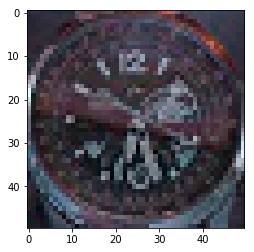

In [103]:
watch = c.imread('watch5050.jpg')

# fig = watch[25:110, 110:200]
plt.imshow(watch)
plt.show()